In [1]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
# URL du jeu de données
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

# Noms des colonnes selon la description du jeu de données
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'origin', 'car name']

# Chargement du jeu de données dans un DataFrame pandas
df = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
                 sep=' ', skipinitialspace=True)

In [4]:
import numpy as np

In [5]:
# Affichage des premières lignes du DataFrame
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,NaN
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,NaN
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,NaN
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,NaN
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,0.0
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,NaN


In [8]:
df = df.drop('car name', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


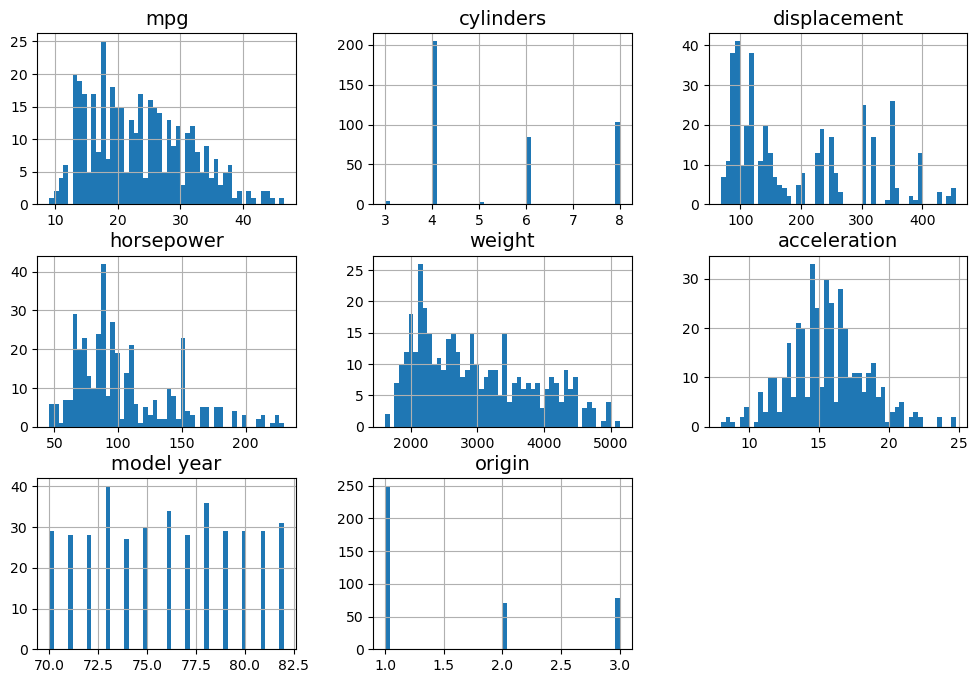

In [10]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
plt.show()

In [11]:
df["weight_cat"] = pd.cut(df["weight"],
                               bins=[0, 2000, 2500, 3000, 3500, 4000, 4500, np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7])

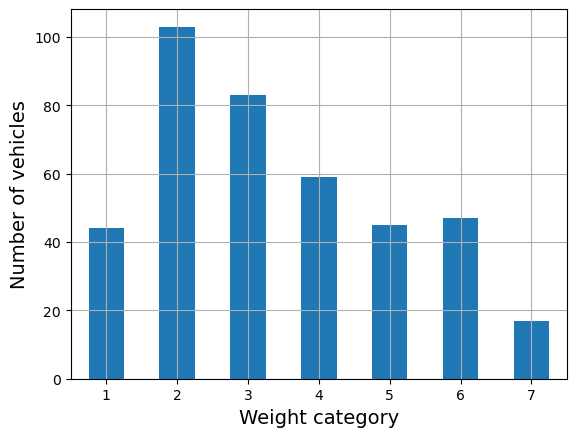

In [12]:
df["weight_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Weight category")
plt.ylabel("Number of vehicles")
plt.show()

In [13]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(df, df["weight_cat"]):
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [14]:
strat_train_set, strat_test_set = strat_splits[0]

In [17]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    df, test_size=0.2, stratify=df["weight_cat"], random_state=42)

In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("weight_cat", axis=1, inplace=True)

In [19]:
df = strat_train_set.copy()

In [20]:
corr_matrix = df.corr(numeric_only=True)

In [98]:
from pandas.plotting import scatter_matrix

attributes = ["mpg", "displacement", "horsepower", "weight", "acceleration"]
scatter_matrix(df[attributes], figsize=(12, 8))

plt.show()

KeyError: "['mpg'] not in index"

In [22]:
df['hp_to_weight'] = df['horsepower'] / df['weight']
df['displacement_per_cylinder'] = df['displacement'] / df['cylinders']
df['weight_to_displacement'] = df['weight'] / df['displacement']
df['hp_times_acceleration'] = df['horsepower'] * df['acceleration']
df['acceleration_to_weight'] = df['acceleration'] / df['weight']

In [23]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["mpg"].sort_values(ascending=True)

weight                      -0.831761
displacement                -0.802571
hp_times_acceleration       -0.794236
horsepower                  -0.785863
cylinders                   -0.774307
displacement_per_cylinder   -0.773599
hp_to_weight                -0.283701
acceleration                 0.435709
origin                       0.558223
model year                   0.584024
weight_to_displacement       0.681075
acceleration_to_weight       0.800361
mpg                          1.000000
Name: mpg, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [24]:
df = strat_train_set.drop("mpg", axis=1)
df_labels = strat_train_set["mpg"].copy()

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [26]:
df_num = df.select_dtypes(include=[np.number])

In [27]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [28]:
imputer.statistics_

array([4.0000e+00, 1.5100e+02, 9.5000e+01, 2.8225e+03, 1.5500e+01,
       7.6000e+01, 1.0000e+00])

In [29]:
df_num.median().values

array([4.0000e+00, 1.5100e+02, 9.5000e+01, 2.8225e+03, 1.5500e+01,
       7.6000e+01, 1.0000e+00])

In [30]:
df["origin"] = df["origin"].map({1: "USA", 2: "Europe", 3: "Japan"})
df_cat = df[["origin"]]
df_cat.head()

,origin
94,USA
25,USA
201,USA
281,USA
24,USA


In [31]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)

In [32]:
print(ordinal_encoder.categories_)

[array(['Europe', 'Japan', 'USA'], dtype=object)]


In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)

In [34]:
df_cat_1hot

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_num_std_scaled = std_scaler.fit_transform(df_num)

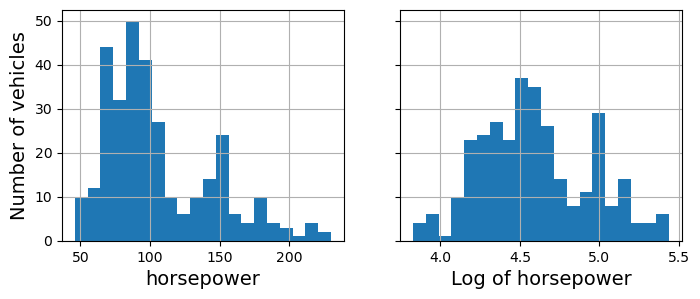

In [36]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df["horsepower"].hist(ax=axs[0], bins=20)
df["horsepower"].apply(np.log).hist(ax=axs[1], bins=20)
axs[0].set_xlabel("horsepower")
axs[1].set_xlabel("Log of horsepower")
axs[0].set_ylabel("Number of vehicles")
plt.show()

In [37]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [38]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [39]:
from sklearn import set_config

set_config(display='diagram')
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [40]:
df_num_prepared = num_pipeline.fit_transform(df_num)
df_num_prepared[:2].round(2)

array([[ 1.48,  2.34,  2.85,  2.07, -1.63, -0.79, -0.72],
       [ 1.48,  1.58,  2.85,  1.93, -0.55, -1.6 , -0.72]])

In [41]:
df_housing_num_prepared = pd.DataFrame(
    df_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=df_num.index)

In [42]:
df_housing_num_prepared.head(2)  # extra code

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
94,1.478741,2.340529,2.854989,2.073751,-1.628595,-0.790204,-0.721125
25,1.478741,1.578480,2.854989,1.932456,-0.548826,-1.599061,-0.721125


In [43]:
from sklearn.compose import ColumnTransformer

num_attribs = ["cylinders", "displacement", "horsepower", "weight",
               "acceleration", "model year"]
cat_attribs = ["origin"]

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [44]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [45]:
df_prepared = preprocessing.fit_transform(df)

In [46]:
df_prepared_fr = pd.DataFrame(
    df_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=df.index)
df_prepared_fr.head(2)

,pipeline-1__cylinders,pipeline-1__displacement,pipeline-1__horsepower,pipeline-1__weight,pipeline-1__acceleration,pipeline-1__model year,pipeline-2__origin_Europe,pipeline-2__origin_Japan,pipeline-2__origin_USA
94,1.478741,2.340529,2.854989,2.073751,-1.628595,-0.790204,0.0,0.0,1.0
25,1.478741,1.578480,2.854989,1.932456,-0.548826,-1.599061,0.0,0.0,1.0


In [47]:
def column_product(X):
    return X[:, [0]] * X[:, [1]]

def product_name(function_transformer, feature_names_in):
    return ["product"]  # feature names out

def product_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_product, feature_names_out=product_name),
        StandardScaler())

In [48]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

In [49]:
from sklearn.preprocessing import FunctionTransformer

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

In [50]:
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("hp_times_acceleration", product_pipeline(), ["horsepower", "acceleration"]),
        ("displacement_per_cylinder", ratio_pipeline(), ["displacement", "cylinders"]),
        ("acceleration_to_weight", ratio_pipeline(), ["acceleration", "weight"]),
        ("log", log_pipeline, ["horsepower", "weight"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

In [51]:
df_prepared = preprocessing.fit_transform(df)
df_prepared.shape

(318, 9)

In [52]:
preprocessing.get_feature_names_out()

array(['hp_times_acceleration__product',
       'displacement_per_cylinder__ratio',
       'acceleration_to_weight__ratio', 'log__horsepower', 'log__weight',
       'cat__origin_Europe', 'cat__origin_Japan', 'cat__origin_USA',
       'remainder__model year'], dtype=object)

In [53]:
df_prepared_fr = pd.DataFrame(
    df_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=df.index)
df_prepared_fr.head(10)

,hp_times_acceleration__product,displacement_per_cylinder__ratio,acceleration_to_weight__ratio,log__horsepower,log__weight,cat__origin_Europe,cat__origin_Japan,cat__origin_USA,remainder__model year
94,2.061686,2.482801,-1.602136,2.259269,1.793899,0.0,0.0,1.0,-0.790204
25,3.711304,1.335012,-1.270968,2.259269,1.702717,0.0,0.0,1.0,-1.599061
201,0.570636,0.952415,-0.613321,0.306022,0.864572,0.0,0.0,1.0,0.018653
281,-0.030387,-0.004076,0.152307,-0.445449,0.160955,0.0,0.0,1.0,0.827510
24,-0.534224,-0.023205,-0.044543,-0.278854,-0.270518,0.0,0.0,1.0,-1.599061
315,0.639690,0.502865,0.434946,-0.278854,0.176365,0.0,0.0,1.0,1.097129
199,0.539946,0.474170,-0.425217,0.028230,0.870414,0.0,0.0,1.0,0.018653
319,-0.630132,-0.386672,0.523995,-0.810250,-0.415635,0.0,1.0,0.0,1.097129
88,1.093654,0.502865,-1.012848,0.945780,1.231802,0.0,0.0,1.0,-0.790204
72,0.808488,0.531559,-1.187935,1.210002,1.097473,0.0,0.0,1.0,-1.059823


In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(df, df_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('hp_times_acceleration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function prod...
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['horsepower', 'weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000150A9CA39D0>)])),
                ('linearregression', LinearRegression())])

In [55]:
df_predictions = lin_reg.predict(df)
df_predictions[:5]

array([11.2599045 ,  5.94311435, 18.57123758, 24.78657452, 19.45713392])

In [56]:
df_labels.iloc[:5].values

array([13. , 10. , 18.5, 19.8, 21. ])

In [57]:
# computes the error ratio
error_ratios = df_predictions[:10] / df_labels.iloc[:10].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-13.4%, -40.6%, 0.4%, 25.2%, -7.3%, 4.2%, -6.9%, -3.9%, -1.3%, -7.4%


In [58]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(df_labels, df_predictions,
                              squared=False)
lin_rmse

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.954089464648958

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(df, df_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('hp_times_acceleration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function prod...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['horsepower', 'weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000150A9CA39D0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [60]:
df_predictions = tree_reg.predict(df)
tree_rmse = mean_squared_error(df_labels, df_predictions,
                              squared=False)
tree_rmse

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

In [61]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, df, df_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [62]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      3.770595
std       0.795299
min       2.806911
25%       3.100642
50%       3.627922
75%       4.459984
max       4.906724
dtype: float64

In [63]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, df, df_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    10.000000
mean      3.057805
std       0.528484
min       2.351011
25%       2.692811
50%       2.935539
75%       3.370026
max       4.056888
dtype: float64

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, df, df_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [65]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      2.788525
std       0.608332
min       2.176541
25%       2.413224
50%       2.552061
75%       3.077579
max       4.198664
dtype: float64

In [66]:
forest_reg.fit(df, df_labels)
df_predictions = forest_reg.predict(df)
forest_rmse = mean_squared_error(df_labels, df_predictions,
                                 squared=False)
forest_rmse

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.0289025783441654

In [67]:
forest_reg.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                SimpleImputer(strategy='median')),
                                               ('standardscaler',
                                                StandardScaler())]),
                     transformers=[('hp_times_acceleration',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('functiontransformer',
                                                     FunctionTransformer(feature_names_out=<function product_name at 0x00000150AA112D30>,
                                                                         func=<f...
                                                     SimpleImputer(strategy='median')),
                                                    ('function

In [68]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
     {"random_forest__n_estimators": [50, 100, 200],
      "random_forest__max_features": [6, 8, 10],
      "random_forest__min_samples_split": [None, 1, 2, 5, 10],
      "random_forest__min_samples_leaf": [None, 1, 2, 5]
     }
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring="neg_root_mean_squared_error")
grid_search.fit(df, df_labels)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
297 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('hp_times_acceleration',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000150A9CA39D0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [6, 8, 10],
                          'random_forest__min_samples_leaf': [None, 1, 2, 5],
                          'random_forest__min_samples_split': [None, 1, 2, 5,
                                                               10],
                          'random_forest__n_estimators': [50, 100, 200]}],
             scoring='neg_root_mean_squared_error')

In [69]:
grid_search.best_params_

{'random_forest__max_features': 10,
 'random_forest__min_samples_leaf': 2,
 'random_forest__min_samples_split': 2,
 'random_forest__n_estimators': 50}

In [70]:
df_predictions = grid_search.predict(df)
grid_search_rmse = mean_squared_error(df_labels, df_predictions,
                                 squared=False)
grid_search_rmse

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.3917421244952262

In [71]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_random_forest__n_estimators",
                 "param_random_forest__max_features",
                 "param_random_forest__min_samples_leaf",
                 "param_random_forest__min_samples_split",
                 "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_estimators", "max_features","min_samples_leaf","min_samples_split"] + score_cols
cv_res[score_cols] = -cv_res[score_cols]

cv_res.head()

,n_estimators,max_features,min_samples_leaf,min_samples_split,split0,split1,split2,mean_test_rmse
156,50,10,2,2,2.872892,3.108660,2.633662,2.871738
159,50,10,2,5,2.894274,3.108761,2.650353,2.884463
158,200,10,2,2,2.939596,3.079388,2.647920,2.888968
157,100,10,2,2,2.918731,3.098214,2.654459,2.890468
161,200,10,2,5,2.951248,3.072736,2.652911,2.892298


In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,geom

param_distribs = {"random_forest__min_samples_leaf": randint(low=1, high=10),
                  "random_forest__min_samples_split": randint(low=1, high=10),
                  "random_forest__n_estimators": randint(low=50, high=200),
                  "random_forest__max_features": randint(low=1, high=10)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=10,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(df, df_labels)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('hp_times_acceleration',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(...
                                        'random_forest__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000150AA5F4310>,
                                        'random_forest__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000150A9CE8580>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000150AA5F4E50>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [73]:
rnd_search.best_params_

{'random_forest__max_features': 5,
 'random_forest__min_samples_leaf': 1,
 'random_forest__min_samples_split': 6,
 'random_forest__n_estimators': 138}

In [74]:
df_predictions = rnd_search.predict(df)
rnd_search_rmse = mean_squared_error(df_labels, df_predictions,
                                 squared=False)
rnd_search_rmse

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.372186614764152

In [75]:
# displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_random_forest__max_features",
                 "param_random_forest__n_estimators",
                 "param_random_forest__min_samples_split",
                 "param_random_forest__min_samples_leaf", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["max_features","n_estimators","min_samples_split","min_samples_leaf"] + score_cols
cv_res[score_cols] = -cv_res[score_cols]
cv_res.head()

,max_features,n_estimators,min_samples_split,min_samples_leaf,split0,split1,split2,mean_test_rmse
5,5,138,6,1,3.159683,3.204887,2.537462,2.782582
1,7,124,7,3,3.115844,3.167145,2.635252,2.803009
3,8,102,6,3,3.125233,3.181561,2.586196,2.805177
7,9,100,5,3,3.067023,3.131077,2.582795,2.819469
8,7,67,9,5,3.135172,3.300590,2.757881,2.850591


In [76]:
final_model = grid_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.04, 0.03, 0.23, 0.11, 0.45, 0.  , 0.  , 0.  , 0.13])

In [77]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.4510146739661676, 'log__weight'),
 (0.23156799638935222, 'acceleration_to_weight__ratio'),
 (0.12595824489143995, 'remainder__model year'),
 (0.11458373770172085, 'log__horsepower'),
 (0.037615983621209485, 'hp_times_acceleration__product'),
 (0.03271110820780897, 'displacement_per_cylinder__ratio'),
 (0.002959385745264322, 'cat__origin_Japan'),
 (0.002085736405908922, 'cat__origin_Europe'),
 (0.001503133071127768, 'cat__origin_USA')]

In [93]:
X_test = strat_test_set.drop("mpg", axis=1)
y_test = strat_test_set["mpg"].copy()

X_test["origin"] = X_test["origin"].map({1: "USA", 2: "Europe", 3: "Japan"})


final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

2.942964501404937


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [94]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.33551551, 3.44491617])

In [96]:
# extra code – shows how to compute a confidence interval for the RMSE
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(2.3355155116617676, 3.444916168478776)

In [97]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(2.346005718151097, 3.4377808661201157)

In [99]:
import joblib

joblib.dump(final_model, "my_vehicle_consumption_model.pkl")

['my_vehicle_consumption_model.pkl']

In [100]:
a = np.linspace(5, 10, 11)
print(a[-3:-1])

[9.  9.5]
